# Iris Dataset Classification - Ayaan Danish

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Reading the data

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Understanding and Preparation

Dataset rows and columns

In [3]:
df.shape

(150, 6)

Dataset column types

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Dataset key statistics

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Checking null values

In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

Text(0.5, 23.52222222222222, '')

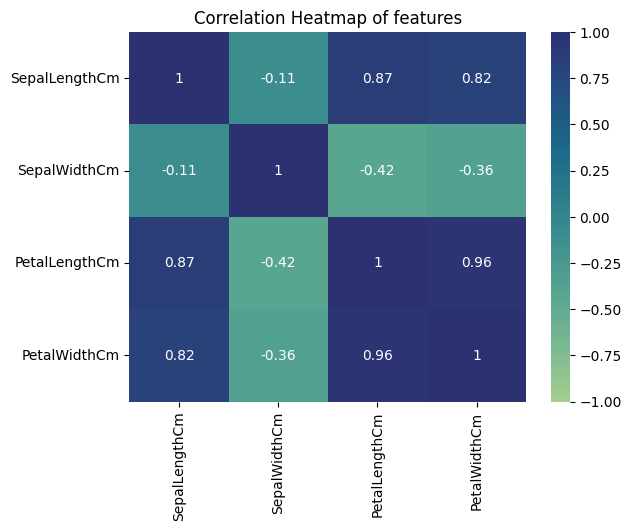

In [7]:
ax = sns.heatmap(
    data=df.drop(columns=["Id"], axis=0).corr(numeric_only=True),
    annot=df.drop(columns=["Id"], axis=0).corr(numeric_only=True),
    cmap="crest",
    vmin=-1,
)
ax.set_title("Correlation Heatmap of features")
ax.set_xlabel(ax.get_xlabel(), rotation=15)

<Axes: title={'center': 'Distribution of flower species in the dataset'}>

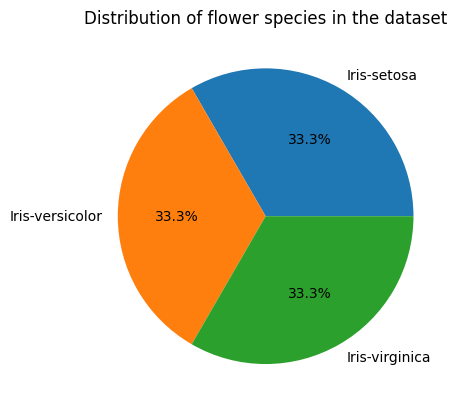

In [8]:
df["Species"].value_counts().plot(
    kind="pie",
    ylabel="",
    autopct="%.1f%%",
    title="Distribution of flower species in the dataset",
)

Text(0.5, 0.98, 'Frequency Distributions of all flower features')

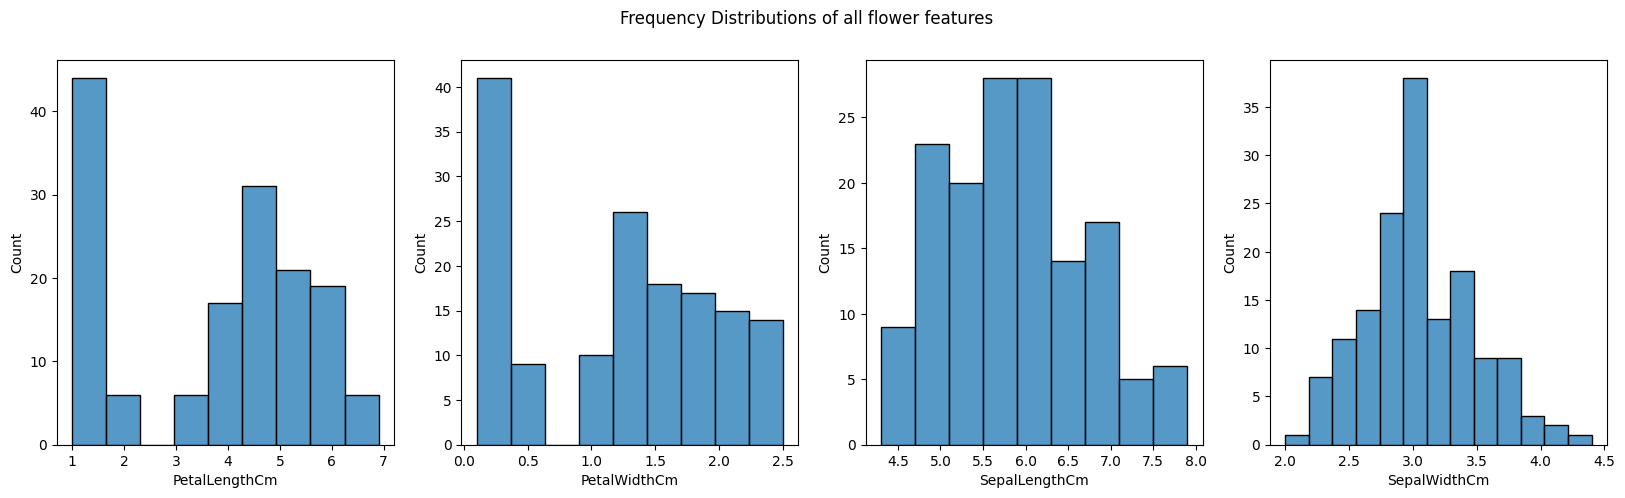

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.histplot(x=df['PetalLengthCm'], ax=axes[0])
sns.histplot(x=df['PetalWidthCm'], ax=axes[1])
sns.histplot(x=df['SepalLengthCm'], ax=axes[2])
sns.histplot(x=df['SepalWidthCm'], ax=axes[3])
plt.suptitle('Frequency Distributions of all flower features')

Text(0.5, 0.98, 'Correlation of Petal and Sepal features')

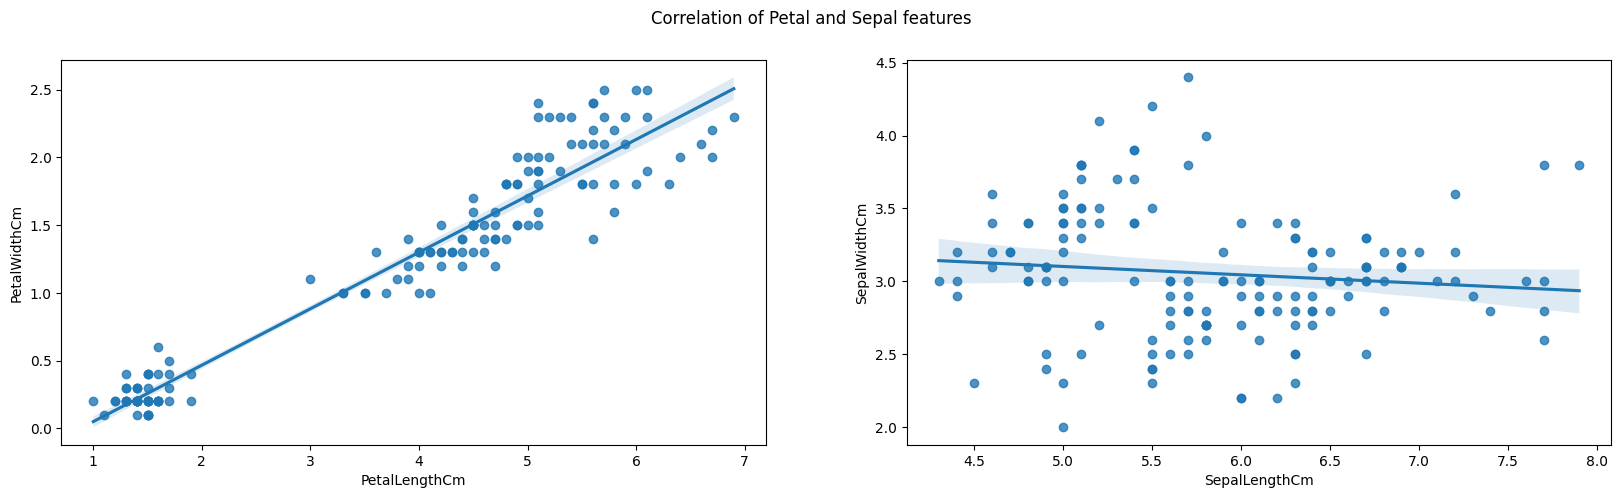

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.regplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], ax=axes[0])
sns.regplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], ax=axes[1])
plt.suptitle('Correlation of Petal and Sepal features')

## Data Modeling

Preparing input and target features

In [11]:
X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Defining function to evaluate models and return results

In [12]:
def evaluate_models(models):
    results_df = pd.DataFrame(
    columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

    for model, model_name in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        metrics = {
            'Model': model_name,
            'Accuracy': accuracy_score(y_pred, y_test),
            'Precision': precision_score(y_pred, y_test, average='macro'),
            'Recall': recall_score(y_pred, y_test, average='macro'),
            'F1 Score': f1_score(y_pred, y_test, average='macro')
        }
    
        results_df.loc[model_name] = metrics

    return results_df

Training all the models and displaying table of results

In [13]:
classification_models = [
    (RandomForestClassifier(), 'Random Forest Classifier'),
    (DecisionTreeClassifier(), 'Decision Tree Classifier'),
    (SVC(kernel='linear', C=1), 'Support Vector Classifier'),
    (KNeighborsClassifier(n_neighbors=3), 'K-Nearest Neighbors Classifier'),
    (GaussianNB(), 'Gaussian Naive Bayes'),
]

evaluate_models(classification_models)

,Accuracy,Precision,Recall,F1 Score
Random Forest Classifier,0.96,0.960234,0.960234,0.960234
Decision Tree Classifier,0.96,0.960234,0.960234,0.960234
Support Vector Classifier,0.98,0.982456,0.979167,0.980238
K-Nearest Neighbors Classifier,0.96,0.960234,0.960234,0.960234
Gaussian Naive Bayes,0.96,0.955556,0.968254,0.959524


Plotting confusion matrix for each model

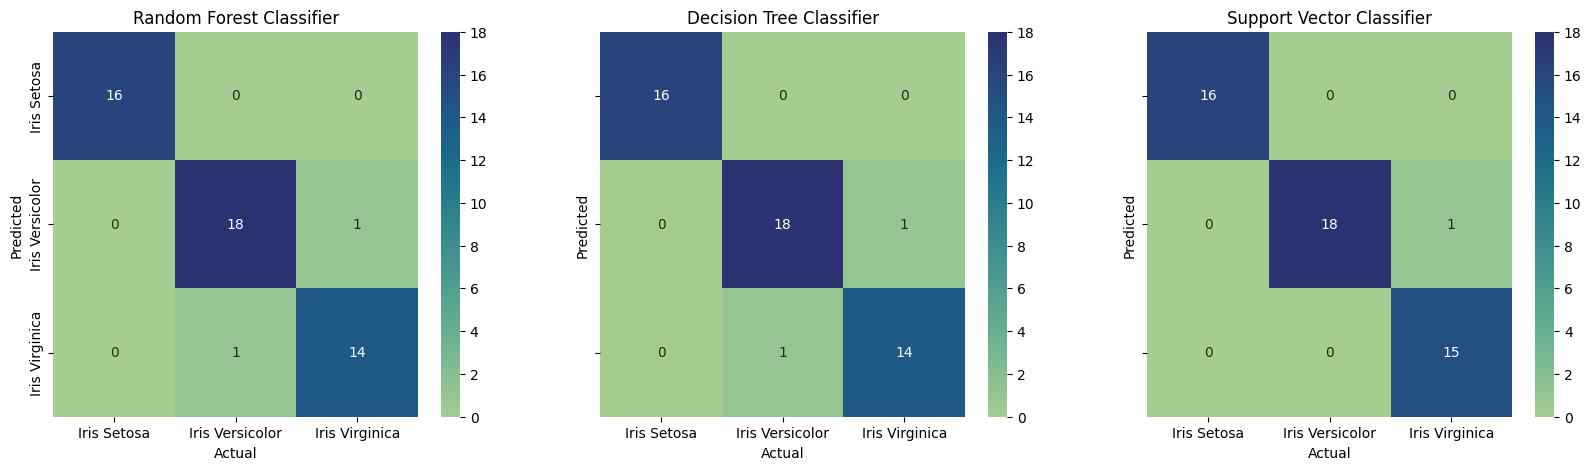

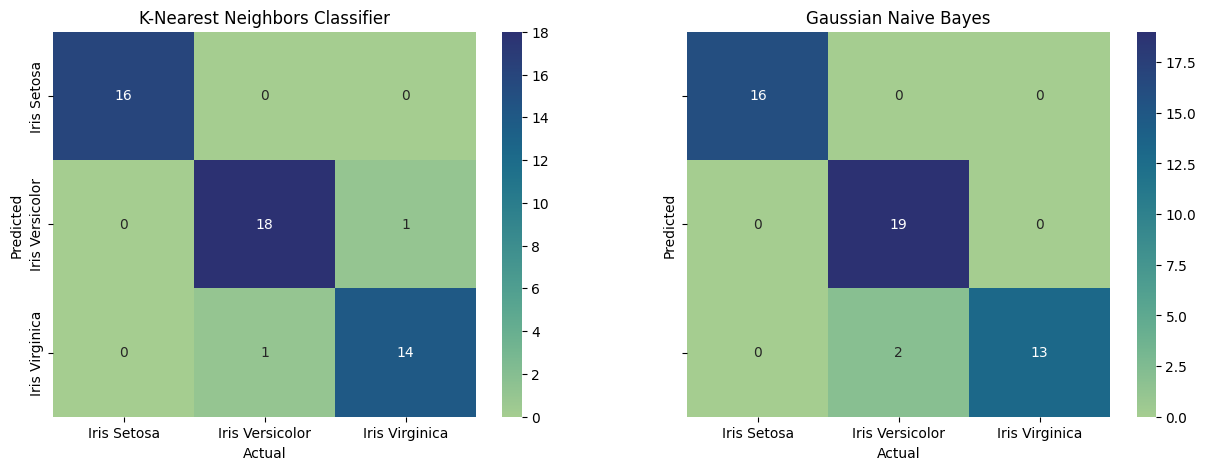

In [14]:
predictions = [m.predict(x_test) for m in (model[0] for model in classification_models)]
class_names = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]
cms = [confusion_matrix(y_test, y_pred) for y_pred in predictions]

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

sns.heatmap(
    cms[0],
    cmap=sns.color_palette("crest", as_cmap=True),
    fmt="",
    ax=axes[0],
    xticklabels=class_names,
    yticklabels=class_names,
    annot=cms[0],
)
sns.heatmap(
    cms[1],
    cmap=sns.color_palette("crest", as_cmap=True),
    fmt="",
    ax=axes[1],
    xticklabels=class_names,
    yticklabels=class_names,
    annot=cms[1],
)
sns.heatmap(
    cms[2],
    cmap=sns.color_palette("crest", as_cmap=True),
    fmt="",
    xticklabels=class_names,
    yticklabels=class_names,
    annot=cms[2],
)

for i, ax in enumerate(axes):
    ax.set_title(classification_models[:3][i][1])
    ax.set_ylabel("Predicted")
    ax.set_xlabel("Actual")

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.heatmap(
    cms[3],
    cmap=sns.color_palette("crest", as_cmap=True),
    fmt="",
    ax=axes[0],
    xticklabels=class_names,
    yticklabels=class_names,
    annot=cms[3],
)
sns.heatmap(
    cms[4],
    cmap=sns.color_palette("crest", as_cmap=True),
    fmt="",
    ax=axes[1],
    xticklabels=class_names,
    yticklabels=class_names,
    annot=cms[4],
)

for i, ax in enumerate(axes):
    ax.set_title(classification_models[3:5][i][1])
    ax.set_ylabel("Predicted")
    ax.set_xlabel("Actual")